# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


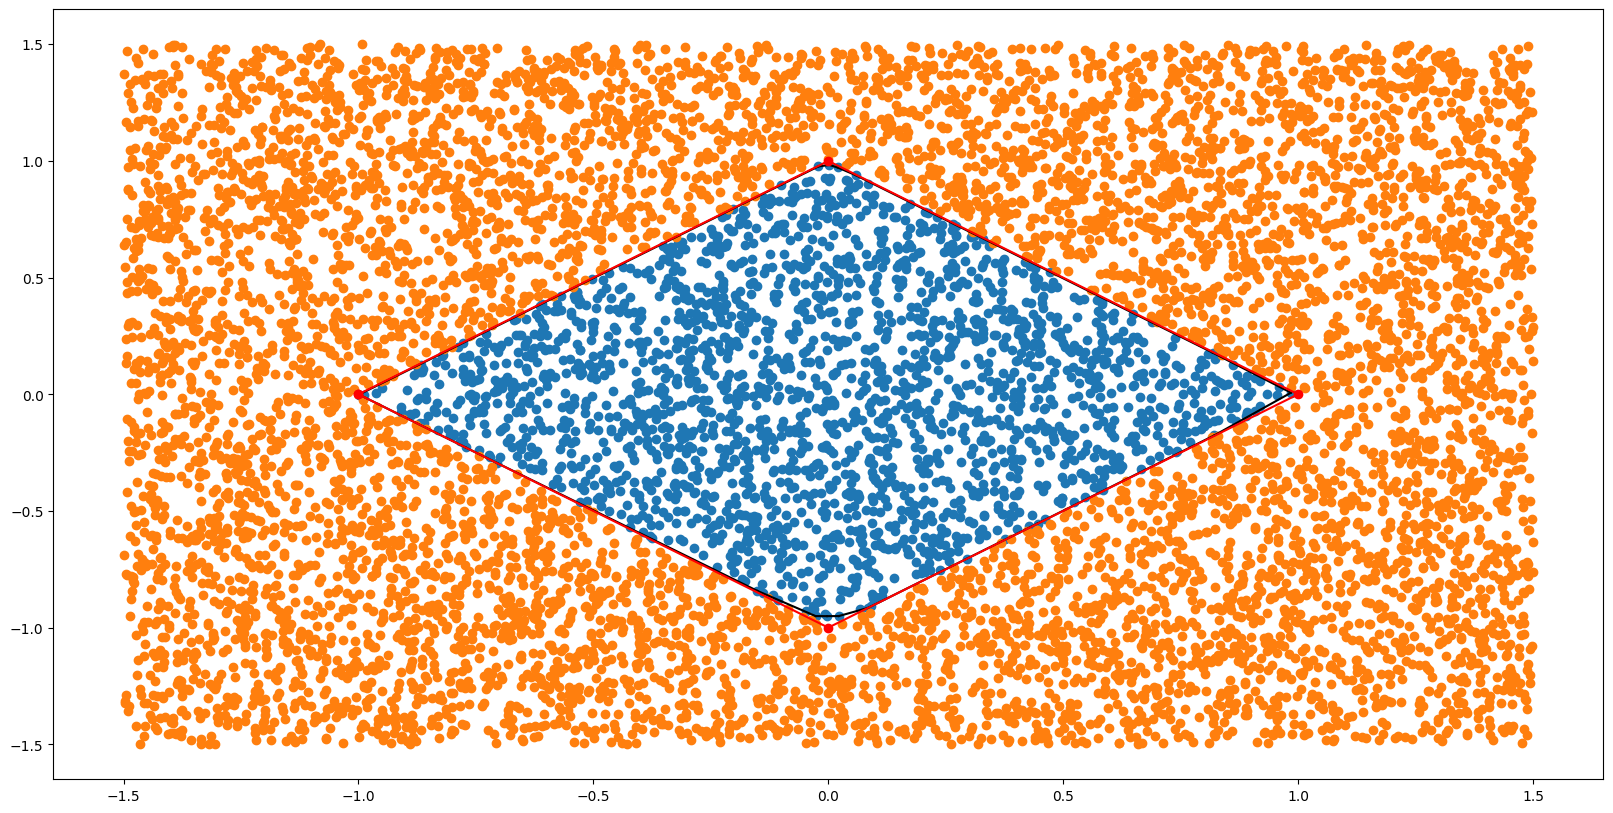

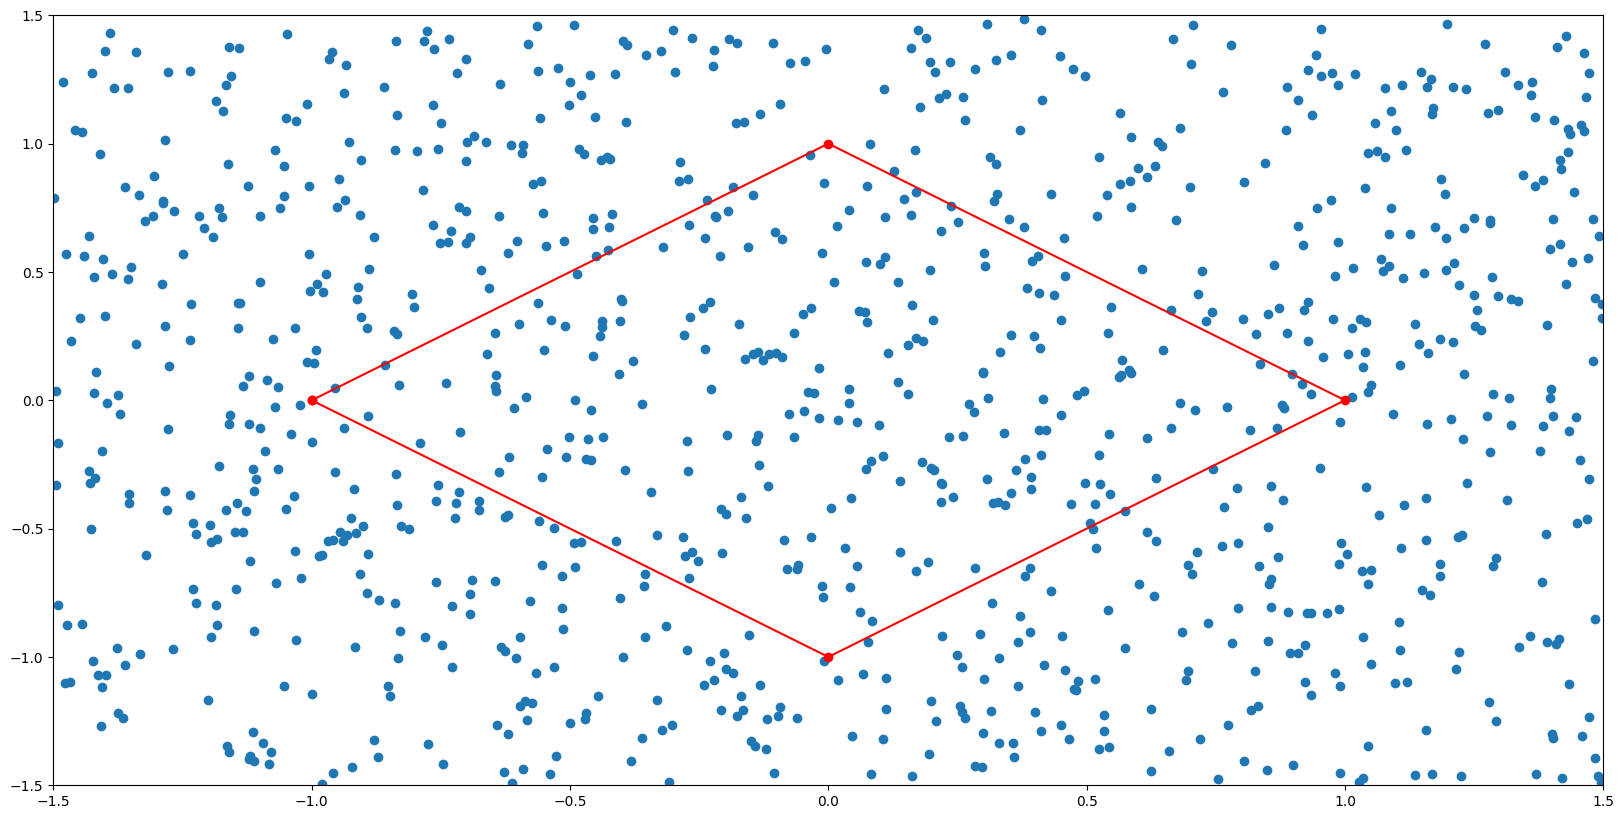

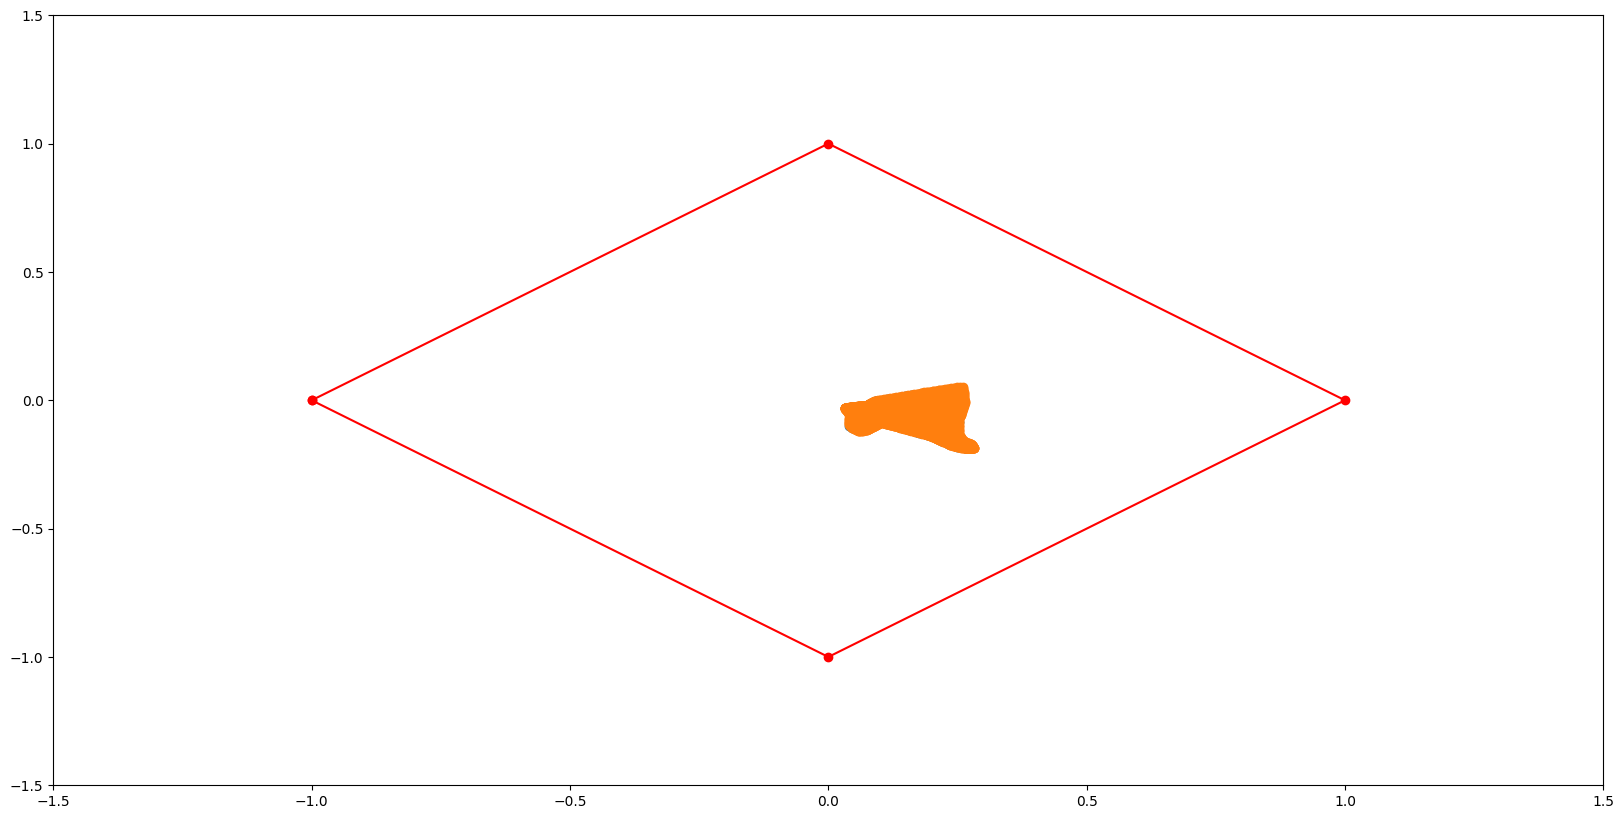

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 1.1947050094604492
batch = 100, mean loss = 1.4025528442741622
batch = 200, mean loss = 1.3622570281005024
batch = 300, mean loss = 1.3223047173300455
batch = 400, mean loss = 1.290787099305531
batch = 500, mean loss = 1.2555195322769606
batch = 600, mean loss = 1.220432700115115
batch = 700, mean loss = 1.1886495114563196
batch = 800, mean loss = 1.1607618120576857
batch = 900, mean loss = 1.1399199670215823
batch = 1000, mean loss = 1.1140267936202077
batch = 1100, mean loss = 1.0892483689479673
batch = 1200, mean loss = 1.0674728436781702
batch = 1300, mean loss = 1.0465905126427615
batch = 1400, mean loss = 1.024058494629135
batch = 1500, mean loss = 1.0050114580863798
batch = 1600, mean loss = 0.9831294044898794
batch = 1700, mean loss = 0.9658612889412359
batch = 1800, mean loss = 0.9505721824921084
batch = 1900, mean loss = 0.9328932206546677
batch = 2000, mean loss = 0.9180669696524046
batch = 2100, mean loss = 0.9041366987657343
batch = 2

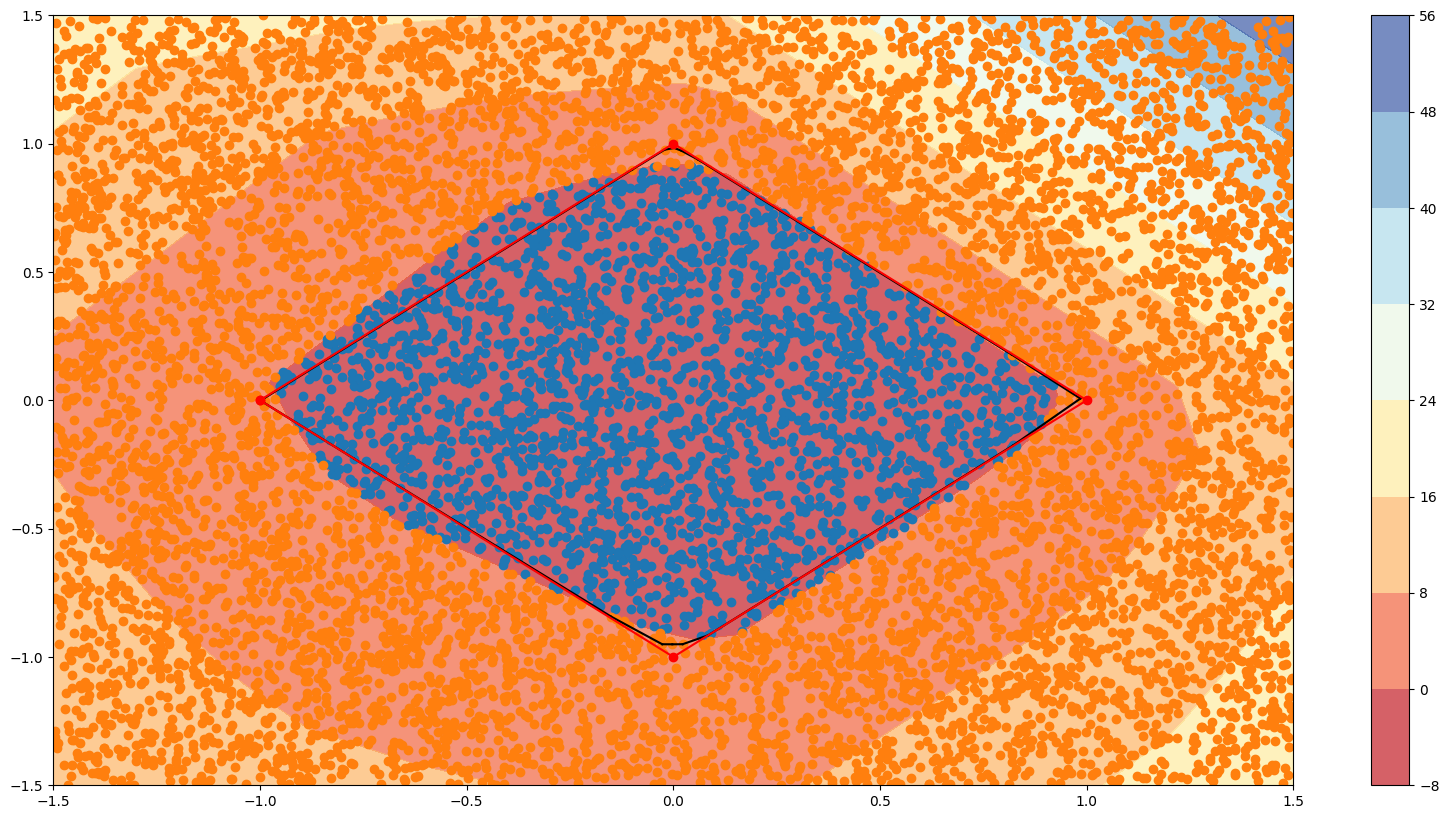

In [6]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 4.306460380554199, l_pos = 0.3904965817928314, l_neg = 3.8956332206726074, l_gen = 0.02033049613237381
batch = 100, mean loss = 3.500839131893498, l_pos = 0.11124111985843076, l_neg = 3.34217899978751, l_gen = 0.04741900445579892
batch = 200, mean loss = 2.454761264929131, l_pos = 0.10611006512366865, l_neg = 1.9813405515419233, l_gen = 0.36731064046237305
batch = 300, mean loss = 2.0168223737482216, l_pos = 0.11350016154819152, l_neg = 1.3475282696005444, l_gen = 0.5557939370172067
batch = 400, mean loss = 1.7942957726499982, l_pos = 0.115826278674112, l_neg = 1.0201569604379277, l_gen = 0.6583125295159302
batch = 500, mean loss = 1.6569428898379237, l_pos = 0.11376815405441913, l_neg = 0.8203173408414215, l_gen = 0.722857392331708
batch = 600, mean loss = 1.5672686974736498, l_pos = 0.11439470276732414, l_neg = 0.6869068977418961, l_gen = 0.7659670949360347
batch = 700, mean loss = 1.502045743305571, l_pos = 0.11372599582295445, l_neg = 0.591095

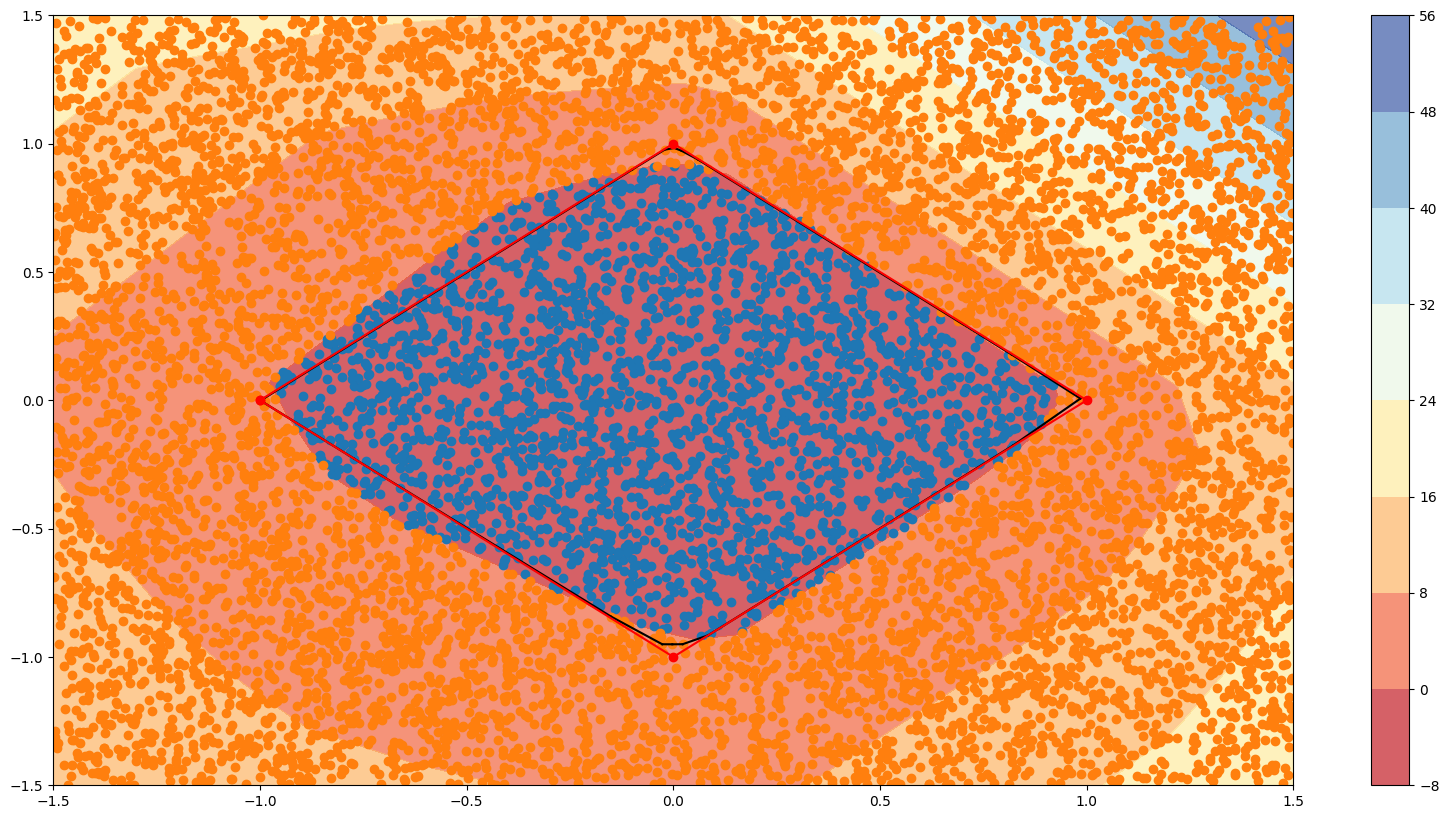

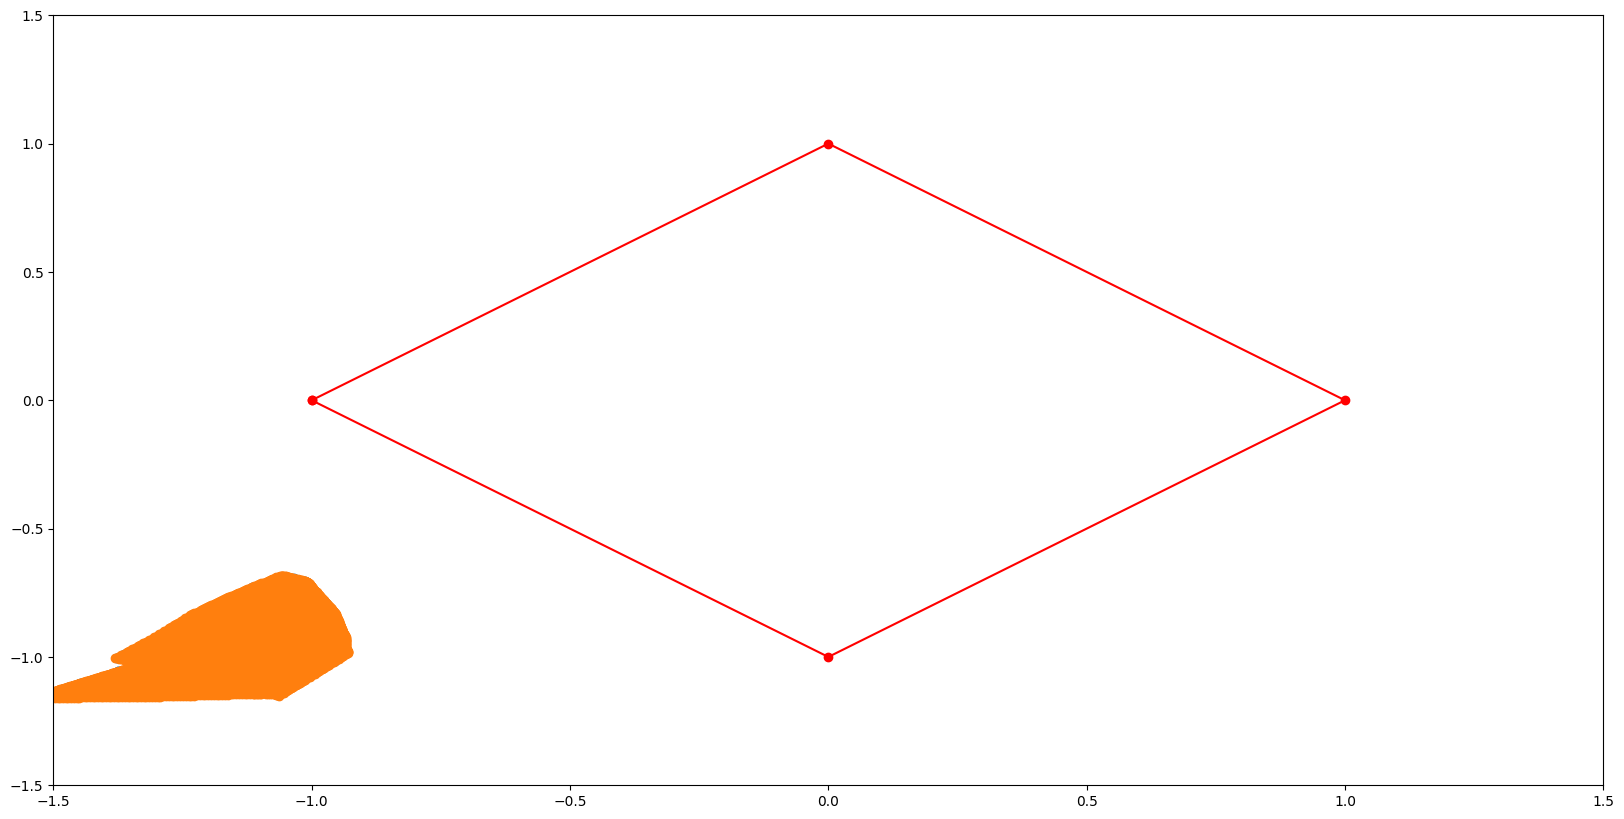

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()